***ABSTRACT***

El presente documento trata sobre el estudio de diferentes variables que inciden en el rubro salud. Aquí se encuentran las distintas etapas que deben cumplirse para lograr llegar a dar respuestas a las interrogantes que se hacen al inicio.
Con este fin, se tomó un Dataset para conocer la situación actual de un grupo heterogeneo de personas y con esto luego quienes hagan uso del presente trabajo, poder llegar a saber qué medidas se deberían llegar a implementar por parte de diferentes instituciones relacionadas con la salud ya sean públicas o privadas.
Esta información permitirá a los profesionales de la salud, tomar medidas orientadas a evitar la aparición de enfermedades o problemas de salud mediante el control de los factores causales o detener su avance y atenuar sus consecuencias una vez establecida.

***DEFINICION DE OBJETIVO***

Con el Dataset elejido la intención es poder obtener información que
permita tener datos ciertos sobre distintos grupos de personas y como influyen los habitos de alimentación, actividad física, etc. en distintos tipos de enfermedades, en base a esto poder tomar medidas que sirvan como forma de tener una población mas saludable.

***PREGUNTAS/HIPOTESIS***

Preguntas de interés que se pueden realizar a partir el dataset seleccionado:


1.   Qué relación existe entre el BMI (Indice de masa corporal) según el género
de las personas?
2.   Se puede diferenciar la cantidad de horas de sueño según el género de las personas?

3.   Qué relación existe entre la salud física y la salud mental de las personas?

4. Qué relación existe entre *la edad* de las personas y los distintos tipos de enfermedades que puede tener una persona (diabetes, problemas cardíacos, hipertensión, etc.)?

5. Qué relación existe entre *el género* de las personas y los distintos tipos de enfermedades que puede tener una persona (diabetes, problemas cardíacos, hipertensión, etc.)?

6. Qué relación existe entre la raza de las personas y la posibilidad de que tengan cáncer en la piel?



***CONTEXTO COMERCIAL***

La población mundial ha experimentado un aumento en la cantidad de enfermedades que terminan perjudicando la calidad de vida. Para poder determinar que medidas se pueden llegar a tomar, se realiza este estudio en donde se realizan ciertas preguntas que se intentan responder y que sirvan de insumo a quienes se ocupen de implementar medidas en beneficio de la salud de las personas.

***PROBLEMA COMERCIAL***

Se realizará la manipulación de los datos de forma tal de poder conocer distintos segmentos de población (edades, raza, hábitos como actividad física, etc.) y cuales son las enfermedades que los aquejan o están proclives a tener, de forma tal de poder saber que hacer para prevenir enfermedades o como actuar en caso de que la enfermedad se encuentre presente.
De esta forma, conociendo a la población cualquier empresa ya sea pública o privada podrá disponer recursos humanos y materiales que tendrá que poner a disposición en los centros de atención a la salud.

Preguntas que se pueden llegar a responder son por ejemplo:

1 - Qué tipos de enfermedades están proclives a tener personas jóvenes?

2 - Qué planes se pueden desarrollar para que personas de mediana edad lleguen a la vejez de la forma mas saludable posible?

3 - Cuales son las dolencias que mas tienen las personas ancianas?

4 - Sabiendo las enfermedades que tienen las personas, que medicación es la mas requerida por los profesionales de la salud para brindar a la población?

***CONTEXTO ANALITICO***

Se ha proporcionado el archivo "heart_2020_cleaned.csv" que contiene información sobre distintos tipos de problemas relacionados con la salud de las personas (tabaquismo, ingesta de alcohol), enfermedades como diabetes, cáncer, etc. También se brinda información como raza, edad, actividad deportiva, tiempo de descanso, etc.
Se debera extraer los datos y prepararlos para su visualización y poder llegar a conclusiones según lo obtenido.



---



In [88]:
from datetime import datetime
start_time = datetime.now()

In [89]:
! pip install chart_studio

In [90]:
! pip install bqplot
! pip install pingouin

In [91]:
from google.colab import drive
import os
drive.mount('/content/gdrive')
# Establecer ruta de acceso en drive
import os
print(os.getcwd())
os.chdir("/content/gdrive/My Drive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive


In [92]:
#Importamos librerias.

# Operaciones Basicas
import numpy as np
import pandas as pd

# Visualizacion de Datos
import matplotlib.pyplot as plt
import seaborn as sns


# Regresiòn lineal
#import statsmodels.formula.api as sm

# Normalización
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale



In [93]:
url = "https://raw.githubusercontent.com/thedamned19/Curso-Data-Science/main/heart_2020_cleaned.csv"

In [94]:
base = pd.read_csv(url)

In [95]:
base.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [96]:
base.tail()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No
319794,No,46.56,No,No,No,0.0,0.0,No,Female,80 or older,Hispanic,No,Yes,Good,8.0,No,No,No


In [97]:
base.shape

(319795, 18)

In [98]:
## Lista que devuelve el nombre de las 18 columnas que conforman al DataFrame
list(base.columns)

['HeartDisease',
 'BMI',
 'Smoking',
 'AlcoholDrinking',
 'Stroke',
 'PhysicalHealth',
 'MentalHealth',
 'DiffWalking',
 'Sex',
 'AgeCategory',
 'Race',
 'Diabetic',
 'PhysicalActivity',
 'GenHealth',
 'SleepTime',
 'Asthma',
 'KidneyDisease',
 'SkinCancer']

In [99]:
Nefropatia = base['KidneyDisease']
Rango_edad = base['AgeCategory']
Cancer_Piel = base['SkinCancer']
Raza = base['Race']
Genero = base['Sex']
Diabetes = base['Diabetic']

**Gráficos realizados.**

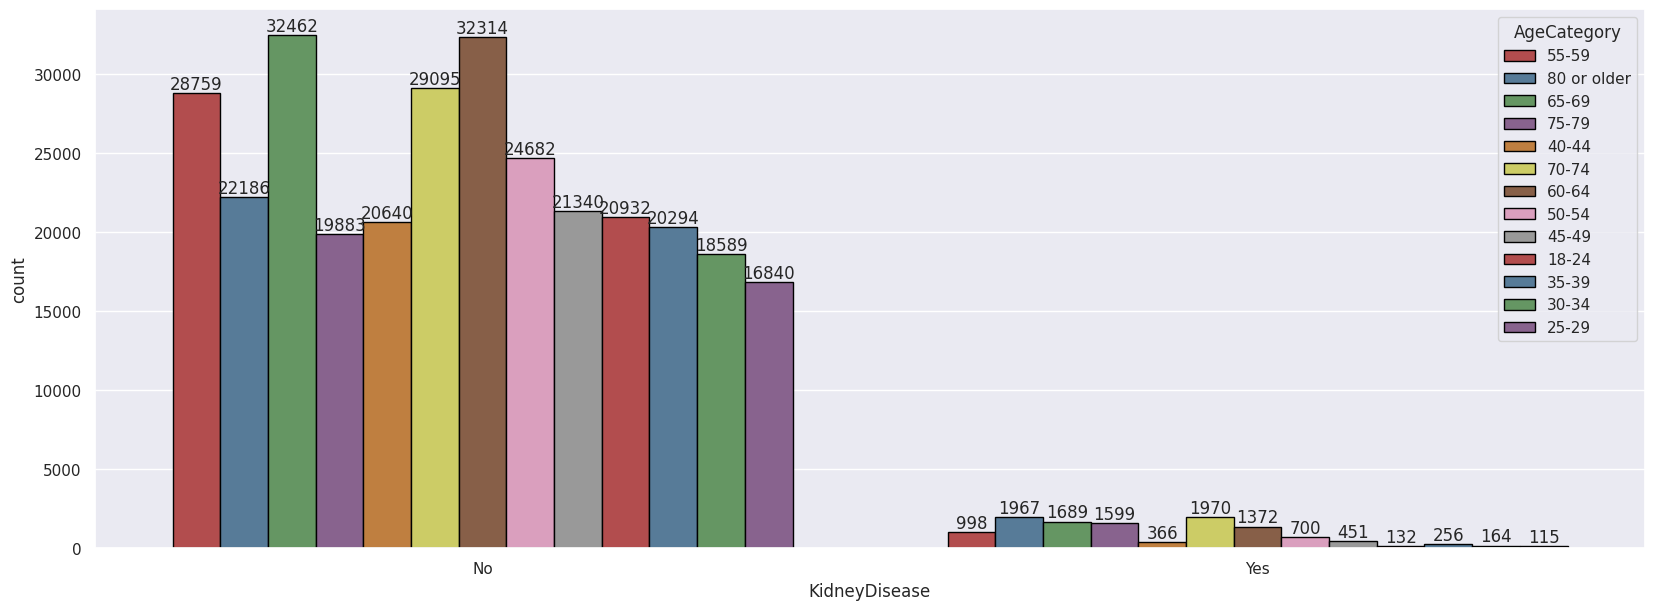

In [100]:
# Count plot
fig, ax = plt.subplots(figsize=(20, 7))
#s = Rango_edad.value_counts().index
sns.set(style='darkgrid')
ax = sns.countplot(x = Nefropatia, hue = Rango_edad, edgecolor = "black", saturation = 0.5, palette="Set1")
for label in ax.containers:
    ax.bar_label(label, )

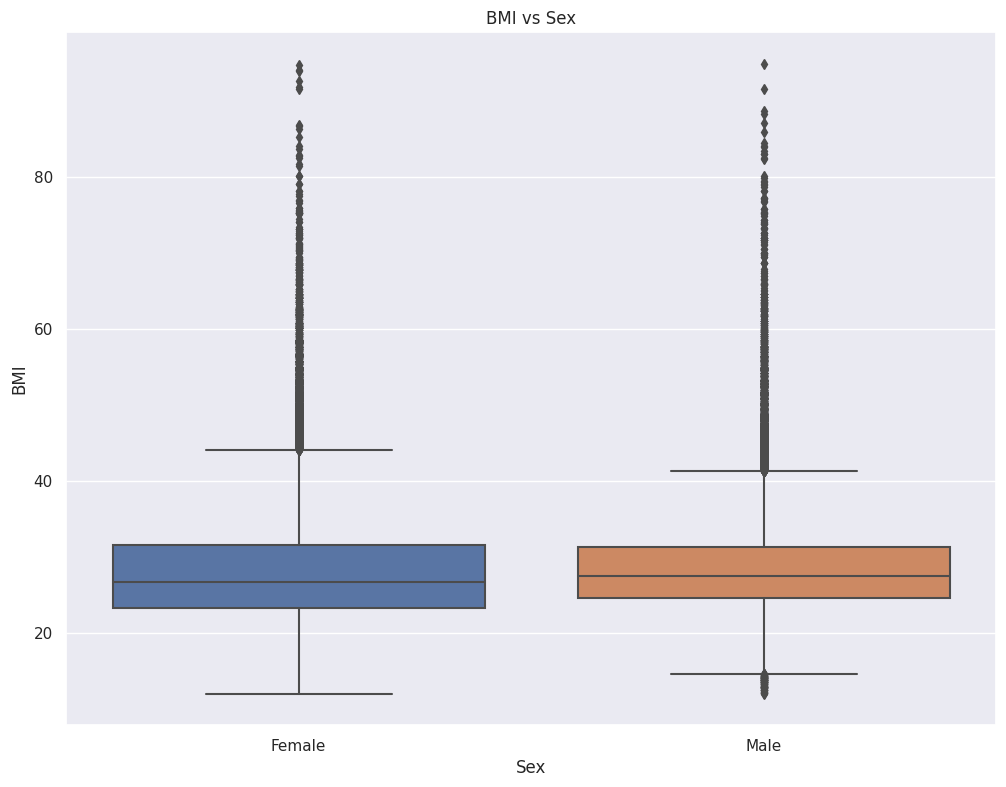

In [101]:
sns.boxplot(x='Sex', y = 'BMI', data = base)
#Data.boxplot(grid= False, column = ['pay'], by = ['gender'])
plt.title("BMI vs Sex");

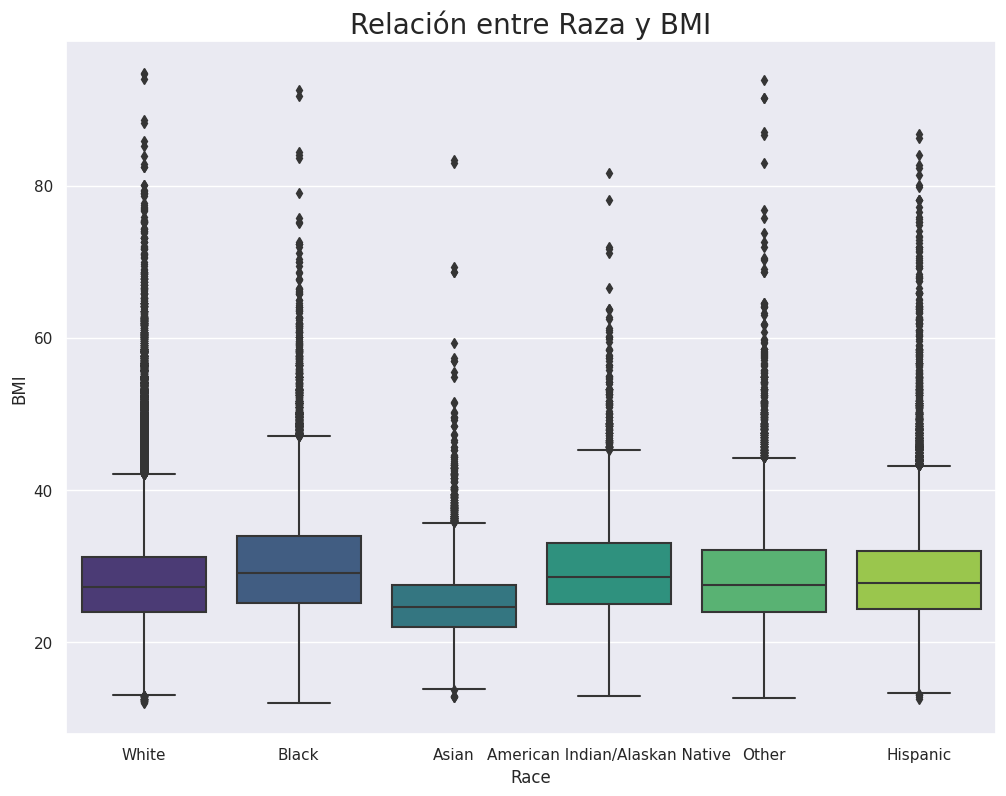

In [102]:
# Relación BMI vs Race
plt.rcParams['figure.figsize'] = (12, 9)
sns.boxplot(x=base.Race, y=base.BMI, palette = 'viridis')
plt.title('Relación entre Raza y BMI', fontsize = 20)
plt.show()

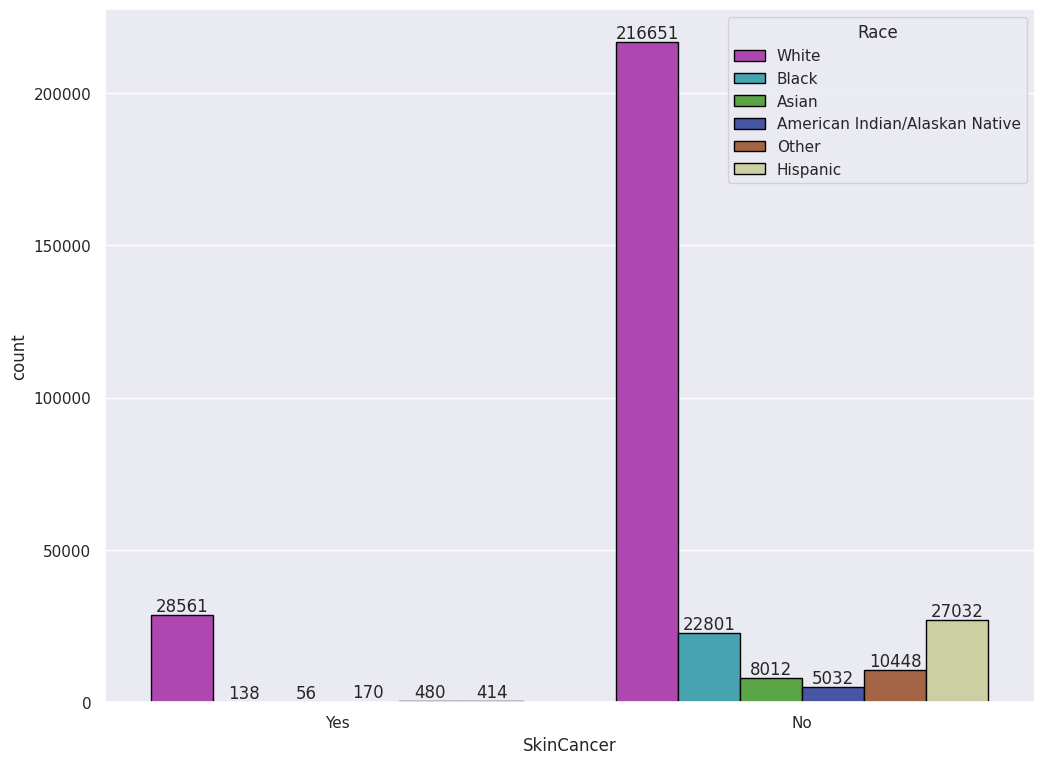

In [103]:
# Count plot
ax = sns.countplot(x = Cancer_Piel, hue = Raza, edgecolor = "black", saturation = 0.5, palette=['#E113E4',"#13CBE4", "#3FD317", "#1736D3", "#D35517", "#DFE58C"])
for label in ax.containers:
    ax.bar_label(label)

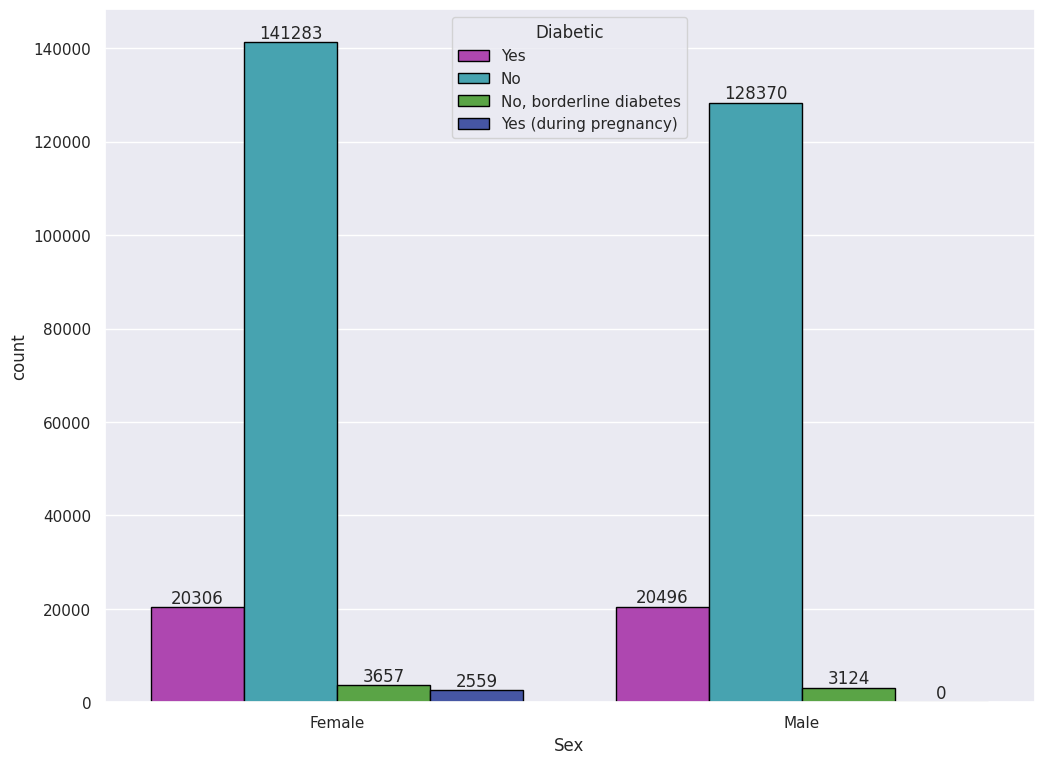

In [104]:
# Count plot
ax = sns.countplot(x = Genero, hue = Diabetes, edgecolor = "black", saturation = 0.5, palette=['#E113E4',"#13CBE4", "#3FD317", "#1736D3"])
for label in ax.containers:
    ax.bar_label(label)

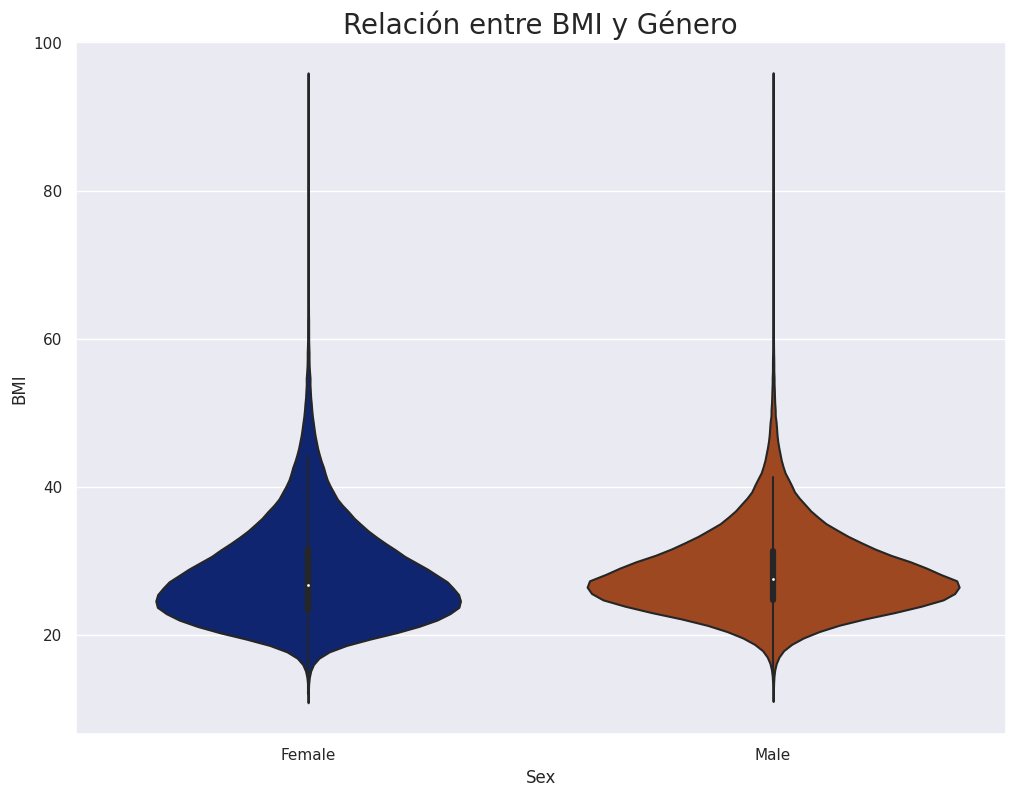

In [105]:
plt.rcParams['figure.figsize'] = (12, 9)
sns.violinplot(x=base['Sex'], y=base['BMI'], palette = 'dark')
plt.title('Relación entre BMI y Género', fontsize = 20, fontweight = 30)
plt.show()

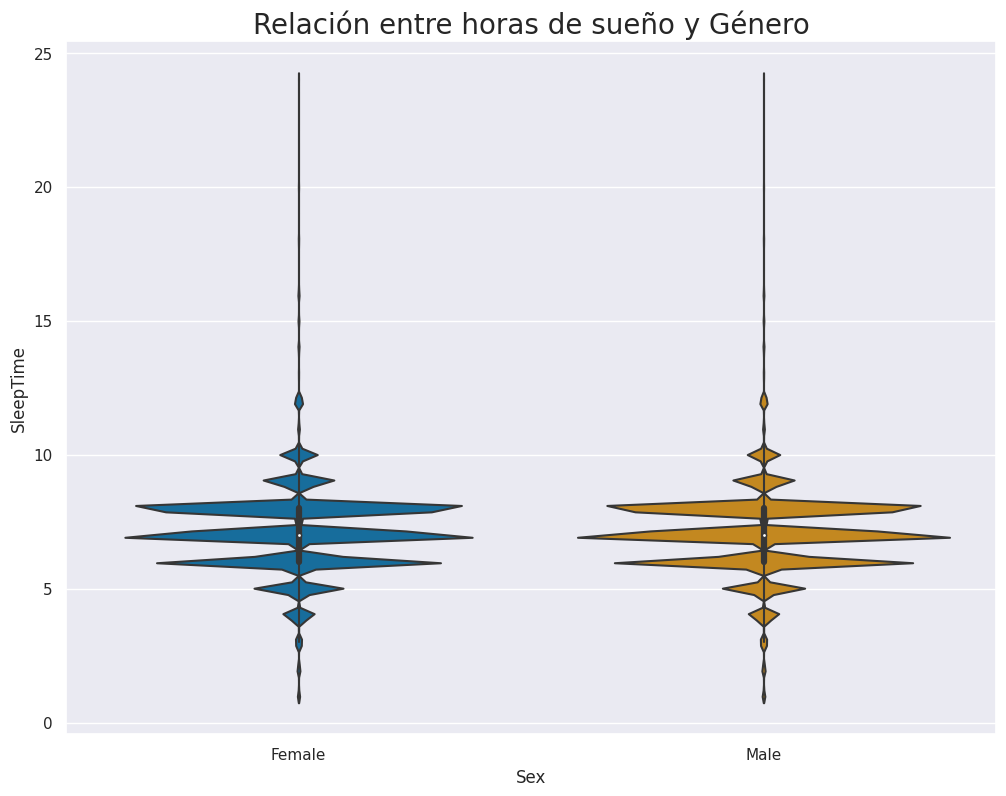

In [106]:
plt.rcParams['figure.figsize'] = (12, 9)
sns.violinplot(x=base['Sex'], y=base['SleepTime'], palette = 'colorblind')
plt.title('Relación entre horas de sueño y Género', fontsize = 20, fontweight = 30)
plt.show()



---



**Encoding.**

In [107]:
# Transformación de variables a numéricos.
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [108]:
ataques = base["HeartDisease"]
print (ataques)

0          No
1          No
2          No
3          No
4          No
         ... 
319790    Yes
319791     No
319792     No
319793     No
319794     No
Name: HeartDisease, Length: 319795, dtype: object


In [109]:
values = array(ataques)
print(values)

['No' 'No' 'No' ... 'No' 'No' 'No']


In [110]:
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print(integer_encoded)

[0 0 0 ... 0 0 0]


In [111]:
# Asignamos a la variable la transformación realizada a numérico.
base["HeartDisease"] = integer_encoded
print(base["HeartDisease"])

0         0
1         0
2         0
3         0
4         0
         ..
319790    1
319791    0
319792    0
319793    0
319794    0
Name: HeartDisease, Length: 319795, dtype: int64


In [112]:
# cargar los datos iniciales en una variable.
inverted = label_encoder.inverse_transform(base["HeartDisease"])
print(inverted)

['No' 'No' 'No' ... 'No' 'No' 'No']


In [113]:
# Asignamos al resto de las variables valores numéricos.
fumador = base["Smoking"]
values = array(ataques)
integer_encoded = label_encoder.fit_transform(values)
base["Smoking"] = integer_encoded

In [114]:
alcholico = base["AlcoholDrinking"]
values = array(alcholico)
integer_encoded = label_encoder.fit_transform(values)
base["AlcoholDrinking"] = integer_encoded

In [115]:
derrame_cerebral = base["Stroke"]
values = array(derrame_cerebral)
integer_encoded = label_encoder.fit_transform(values)
base["Stroke"] = integer_encoded

In [116]:
dificultad_caminar = base["DiffWalking"]
values = array(dificultad_caminar)
integer_encoded = label_encoder.fit_transform(values)
base["DiffWalking"] = integer_encoded

In [117]:
genero = base["Sex"]
values = array(genero)
integer_encoded = label_encoder.fit_transform(values)
base["Sex"] = integer_encoded

In [118]:
rango_edad = base["AgeCategory"]
values = array(rango_edad)
integer_encoded = label_encoder.fit_transform(values)
base["AgeCategory"] = integer_encoded

In [119]:
raza = base["Race"]
values = array(raza)
integer_encoded = label_encoder.fit_transform(values)
base["Race"] = integer_encoded

In [120]:
diabetico = base["Diabetic"]
values = array(diabetico)
integer_encoded = label_encoder.fit_transform(values)
base["Diabetic"] = integer_encoded

In [121]:
actividad_fisica = base["PhysicalActivity"]
values = array(actividad_fisica)
integer_encoded = label_encoder.fit_transform(values)
base["PhysicalActivity"] = integer_encoded

In [122]:
salud = base["GenHealth"]
values = array(salud)
integer_encoded = label_encoder.fit_transform(values)
base["GenHealth"] = integer_encoded

In [123]:
asmatico = base["Asthma"]
values = array(asmatico)
integer_encoded = label_encoder.fit_transform(values)
base["Asthma"] = integer_encoded

In [124]:
nefropatia = base["KidneyDisease"]
values = array(nefropatia)
integer_encoded = label_encoder.fit_transform(values)
base["KidneyDisease"] = integer_encoded

In [125]:
cancer_piel = base["SkinCancer"]
values = array(cancer_piel)
integer_encoded = label_encoder.fit_transform(values)
base["SkinCancer"] = integer_encoded



---



**Exploratory Data Analysis (EDA)**

In [126]:
base.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,0,0,0,3.0,30.0,0,0,7,5,2,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,12,5,0,1,4,7.0,0,0,0
2,0,26.58,0,0,0,20.0,30.0,0,1,9,5,2,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,11,5,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,4,5,0,1,4,8.0,0,0,0


In [127]:
base.shape

(319795, 18)

In [128]:
#Verificación de datos nulos en todo el dataset.
base.isnull()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
319791,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
319792,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
319793,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

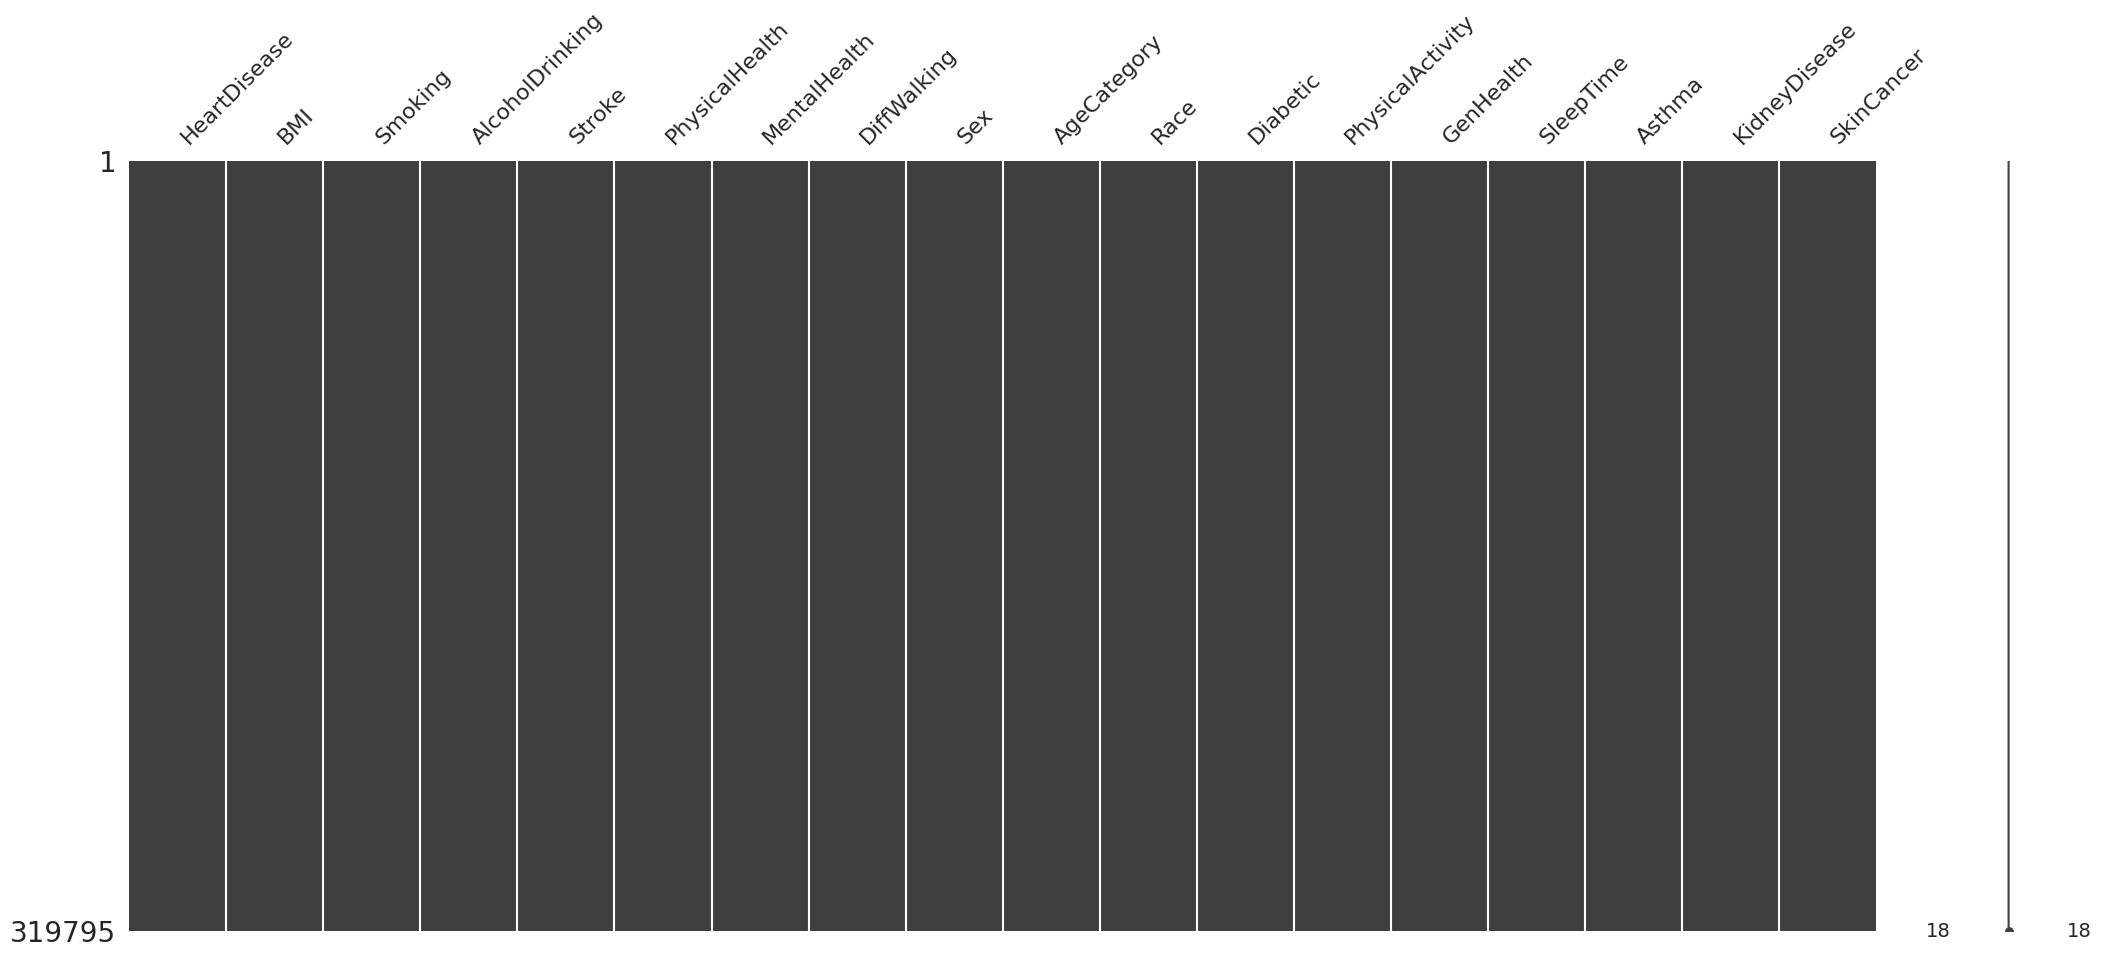

In [129]:
#Forma visual que permite ver si el dataset tiene datos nulos.
!pip install missingno
import missingno as msno
msno.matrix(base)

In [130]:
#Verificación de nulos por columna.
base.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [131]:
#Verificación de nulos total.
sum(base.isnull().sum())

0

In [132]:
#Totalidad de registros por columnas
base.count()

HeartDisease        319795
BMI                 319795
Smoking             319795
AlcoholDrinking     319795
Stroke              319795
PhysicalHealth      319795
MentalHealth        319795
DiffWalking         319795
Sex                 319795
AgeCategory         319795
Race                319795
Diabetic            319795
PhysicalActivity    319795
GenHealth           319795
SleepTime           319795
Asthma              319795
KidneyDisease       319795
SkinCancer          319795
dtype: int64

In [133]:
#Tipo de dato de cada columna
base.dtypes

HeartDisease          int64
BMI                 float64
Smoking               int64
AlcoholDrinking       int64
Stroke                int64
PhysicalHealth      float64
MentalHealth        float64
DiffWalking           int64
Sex                   int64
AgeCategory           int64
Race                  int64
Diabetic              int64
PhysicalActivity      int64
GenHealth             int64
SleepTime           float64
Asthma                int64
KidneyDisease         int64
SkinCancer            int64
dtype: object

In [134]:
#Tipo de estructura del dataset
type(base)

pandas.core.frame.DataFrame

In [135]:
#Principales medidas estadisticas
base.describe().T

,count,mean,std,min,25%,50%,75%,max
HeartDisease,319795.0,0.085595,0.279766,0.00,0.00,0.00,0.00,1.00
BMI,319795.0,28.325399,6.356100,12.02,24.03,27.34,31.42,94.85
Smoking,319795.0,0.085595,0.279766,0.00,0.00,0.00,0.00,1.00
AlcoholDrinking,319795.0,0.068097,0.251912,0.00,0.00,0.00,0.00,1.00
Stroke,319795.0,0.037740,0.190567,0.00,0.00,0.00,0.00,1.00
PhysicalHealth,319795.0,3.371710,7.950850,0.00,0.00,0.00,2.00,30.00
MentalHealth,319795.0,3.898366,7.955235,0.00,0.00,0.00,3.00,30.00
DiffWalking,319795.0,0.138870,0.345812,0.00,0.00,0.00,0.00,1.00
Sex,319795.0,0.475273,0.499389,0.00,0.00,0.00,1.00,1.00
AgeCategory,319795.0,6.514536,3.564759,0.00,4.00,7.00,9.00,12.00




---



In [136]:
# Dejo como comentado la normalización ya que da error para el hypertuning de parámetros.
# Normalización del dataset.

# Inicilización del scaler.
#scaler = StandardScaler()
# Fit Transform
#base[base.columns] = scaler.fit_transform(base[base.columns]) # df con los datos normalizados

#base.head()



---



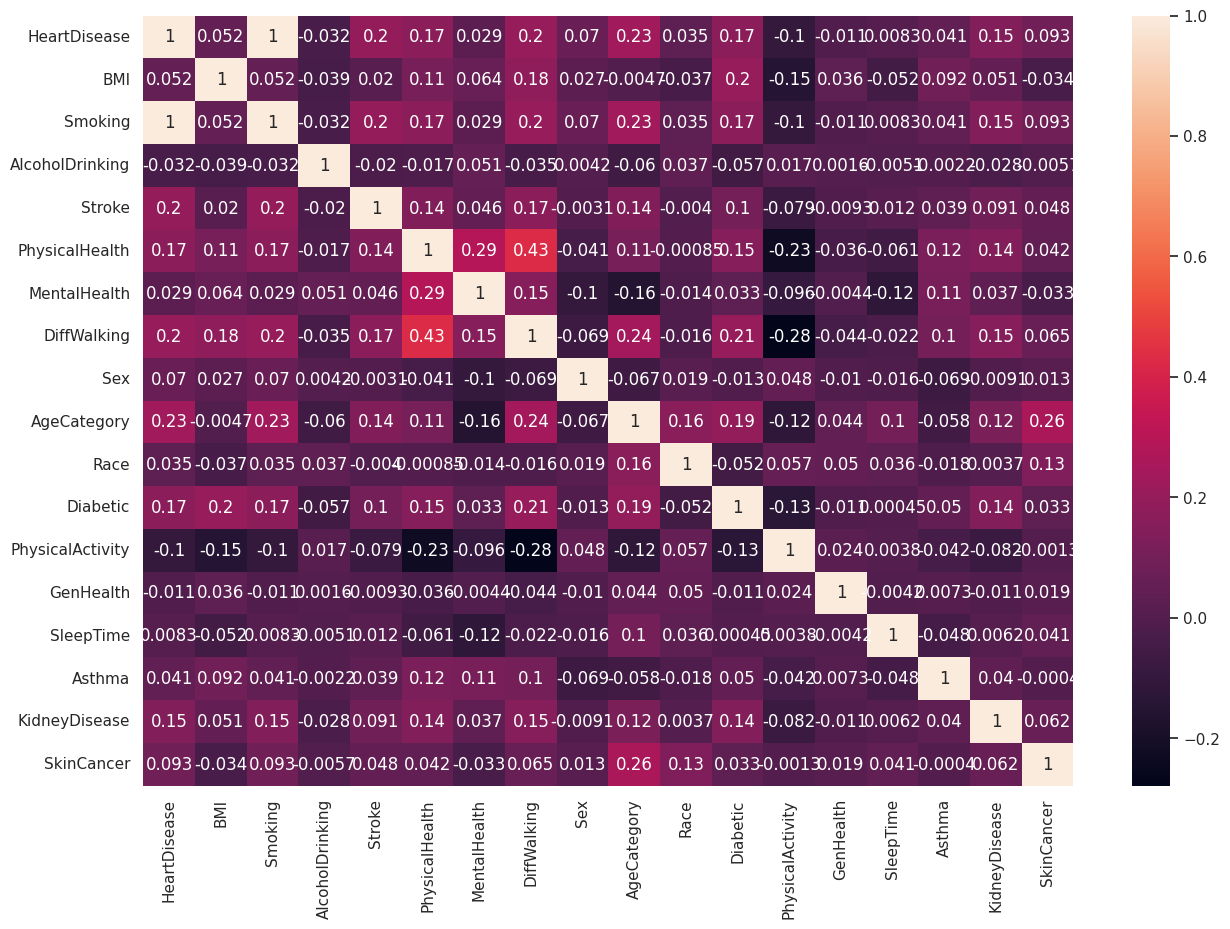

In [137]:
#Correlaciones
plt.figure(figsize=(15, 10))

base_corr = base.corr()
sns.heatmap(base_corr,
            xticklabels = base_corr.columns.values,
            yticklabels = base_corr.columns.values,
            annot = True);



---



 **Modelo de clasificación.**

ELECCION DE ALGORITMO. De acuerdo al tipo de variables que tenemos en nuestro Dataset, y por ser una variable de clasificación la que tenemos que predecir ("HeartDisease"), elegimos un algoritmo de clasificacion, para evaluar la performance de nuestro modelo aplicado. Usaremos el DecisionTreeClassifier y aplicaremos la "Matriz de Confusión".

   Arbol de Decisión.

In [138]:
X = base.drop(columns=['HeartDisease'])
X.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,16.60,0,0,0,3.0,30.0,0,0,7,5,2,1,4,5.0,1,0,1
1,20.34,0,0,1,0.0,0.0,0,0,12,5,0,1,4,7.0,0,0,0
2,26.58,0,0,0,20.0,30.0,0,1,9,5,2,1,1,8.0,1,0,0
3,24.21,0,0,0,0.0,0.0,0,0,11,5,0,0,2,6.0,0,0,1
4,23.71,0,0,0,28.0,0.0,1,0,4,5,0,1,4,8.0,0,0,0


In [139]:
X.shape

(319795, 17)

In [140]:
base['HeartDisease'].value_counts()

0    292422
1     27373
Name: HeartDisease, dtype: int64

In [141]:
# Defino el vector y
y = base['HeartDisease']
print(y.shape, type(y[0]))

(319795,) <class 'numpy.int64'>


In [142]:
# Modifico el tipo de la variable y
y = y.astype('int')

In [143]:
from sklearn.model_selection import train_test_split
# Divido la matriz X y el vector y en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [144]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(223856, 17) (95939, 17) (223856,) (95939,)


In [145]:
# Crear el modelo.
from sklearn.tree import DecisionTreeClassifier
arbol_de_decision = DecisionTreeClassifier(max_depth=4, random_state = 42)

In [146]:
# Entrenar el modelo.
arbol_de_decision.fit(X_train,y_train) #Entrenamos el modelo

DecisionTreeClassifier(max_depth=4, random_state=42)

In [147]:
#Predicción
# Predicción en Train
y_train_pred = arbol_de_decision.predict(X_train)
# Predicción en Test
y_test_pred = arbol_de_decision.predict(X_test)

In [148]:
y_test_pred

array([0, 0, 0, ..., 0, 0, 0])

In [149]:
y_test

271884    0
270361    0
219060    0
24010     0
181930    0
         ..
258889    0
199549    0
40243     0
109200    0
142745    0
Name: HeartDisease, Length: 95939, dtype: int64

In [150]:
# Calculo el accuracy en Train
from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(y_train, y_train_pred)

# Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de entrenamiento:', round(100*train_accuracy, 1))
print('% de aciertos sobre el set de evaluación:',round(100*test_accuracy, 1))

% de aciertos sobre el set de entrenamiento: 100.0
% de aciertos sobre el set de evaluación: 100.0


In [151]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     87649
           1       1.00      1.00      1.00      8290

    accuracy                           1.00     95939
   macro avg       1.00      1.00      1.00     95939
weighted avg       1.00      1.00      1.00     95939



In [152]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_score1 = arbol_de_decision.predict_proba(X_test)[:,1]
y_score1

array([0., 0., 0., ..., 0., 0., 0.])

In [153]:
print('roc_auc_score for DecisionTree: ', roc_auc_score(y_test, y_score1))

roc_auc_score for DecisionTree:  1.0


#### Para cuantificar la calidad del modelo de otra forma podemos hacerlo a través de la matriz de confusión.
#### En la misma se indican:
    - Verdaderos Positivos -> resultado en el que el modelo predice correctamente la clase positiva.
    - Falsos Positivos -> resultado donde el modelo predice incorrectamente la clase positiva cuando en realidad es negativa.
    - Verdaderos Negativos -> resultado donde el modelo predice correctamente la clase negativa.
    - Falsos Negativos -> resultado en el que el modelo predice incorrectamente la clase negativa cuando en realidad es positiva.
 Tanto Falsos positivos como negativos son indeseados, conocidos como error de tipo 1 y error de tipo 2.

In [154]:
from sklearn.metrics import confusion_matrix

In [155]:
# Determinamos la matriz de confusión a partir de la comparación
# entre los vectores "y_test" e "y_test_pred".
c_m = confusion_matrix(y_test, y_test_pred)
c_m

array([[87649,     0],
       [    0,  8290]])

<Figure size 800x400 with 0 Axes>

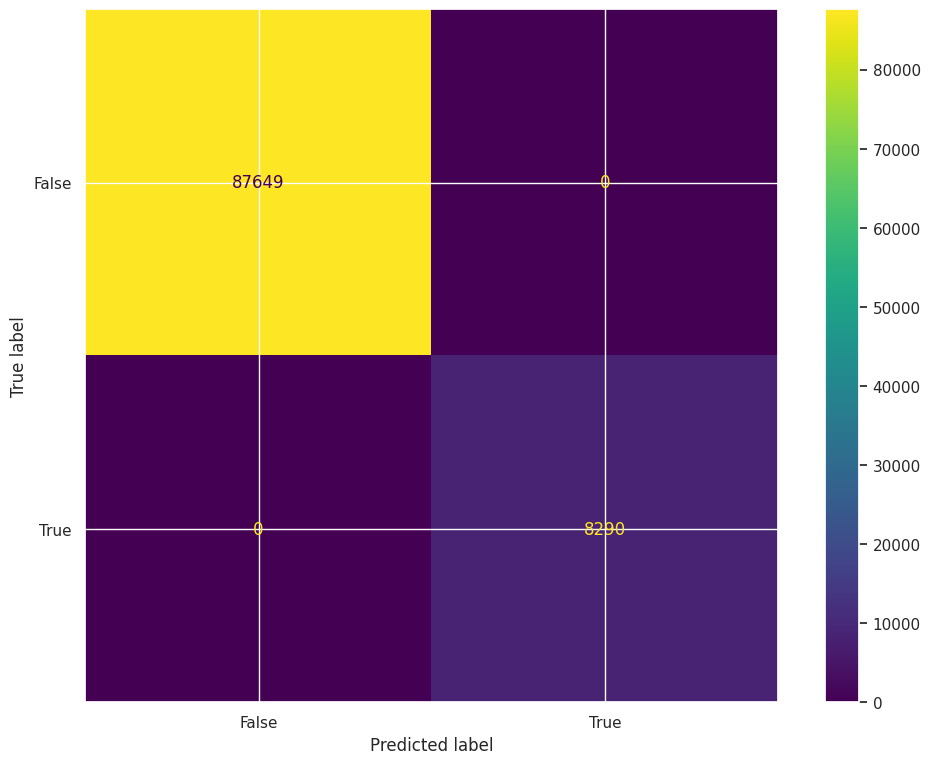

In [156]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
# Crear la visualización de la matriz de confusión.
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = c_m, display_labels = [False, True])

# Graficar la matriz de confusión.
plt.figure(figsize=(8,4))
cm_display.plot()
plt.show()





Podemos verificar en la matriz de confusión que no existen falsos positivos y tampoco falsos negativos.
Se observa que 87649 y 8290 quedaron bien clasificados, mientras que no hubo malas clasificaciones por lo dicho anteriormente.

**Curva AUC - ROC.**

Métrica de rendimiento nos permite medir el rendimiento del modelo de clasificación.
Cuanto mayor sea el valor de AUC (Área bajo la curva), mejor será nuestro clasificador para predecir las clases.

In [157]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_score1 = arbol_de_decision.predict_proba(X_test)[:,1]
y_score1

array([0., 0., 0., ..., 0., 0., 0.])

In [158]:
# Calculo de tasas
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)

In [159]:
print('roc_auc_score for DecisionTree: ', roc_auc_score(y_test, y_score1))

roc_auc_score for DecisionTree:  1.0


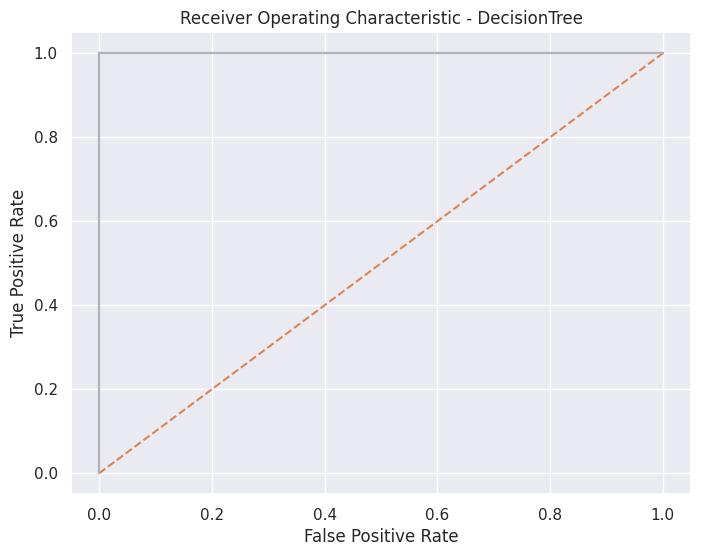

In [160]:
plt.subplots(1, figsize=(8,6))
plt.title('Receiver Operating Characteristic - DecisionTree')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()







---



PCA.

Técnica utilizada para la identificación de un número pequeño de variables no correlacionadas de un conjunto mas grande de datos.

In [161]:
#Preprocesamiento
X = base.drop('HeartDisease', 1)
y = base['HeartDisease']

<ipython-input-161-1991882d685e>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = base.drop('HeartDisease', 1)


In [162]:
X

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,16.60,0,0,0,3.0,30.0,0,0,7,5,2,1,4,5.0,1,0,1
1,20.34,0,0,1,0.0,0.0,0,0,12,5,0,1,4,7.0,0,0,0
2,26.58,0,0,0,20.0,30.0,0,1,9,5,2,1,1,8.0,1,0,0
3,24.21,0,0,0,0.0,0.0,0,0,11,5,0,0,2,6.0,0,0,1
4,23.71,0,0,0,28.0,0.0,1,0,4,5,0,1,4,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,27.41,1,0,0,7.0,0.0,1,1,8,3,2,0,1,6.0,1,0,0
319791,29.84,0,0,0,0.0,0.0,0,1,3,3,0,1,4,5.0,1,0,0
319792,24.24,0,0,0,0.0,0.0,0,0,5,3,0,1,2,6.0,0,0,0
319793,32.81,0,0,0,0.0,0.0,0,0,1,3,0,0,2,12.0,0,0,0


In [163]:
y

0         0
1         0
2         0
3         0
4         0
         ..
319790    1
319791    0
319792    0
319793    0
319794    0
Name: HeartDisease, Length: 319795, dtype: int64

In [164]:
#Separamos en train y test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [165]:
#Normalizamos los datos para que PCA funcione mejor!
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [166]:
#Aplicacion de PCA
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [167]:
#Análisis de la varianza explicada para cada componente
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.14010443, 0.09308211, 0.06971481, 0.06321546, 0.06292649,
       0.05838254, 0.05664351, 0.05575846, 0.05411902, 0.05248175,
       0.0500802 , 0.04816513, 0.04662012, 0.04318983, 0.04228123,
       0.03252451, 0.0307104 ])

**Insights**:

El primer componente principal es responsable de la varianza del 14%. De manera similar, el segundo componente principal causa una variación del 9% en el conjunto de datos. En conjunto, podemos decir que (14 + 9) el 23% por ciento de la información de clasificación contenida en el conjunto de características es capturada por los dos primeros componentes principales, el resto es mayor en total pero tomados de a uno cada componente es menor que los dos primeros.

**Insights**:

Únicamente utilizando una componente tenemos un accuracy muy bueno para nuestro modelo.



---



**Hypertuning parámetros.**

In [168]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
#from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.experimental import enable_halving_search_cv


In [169]:
#Selección manual.
model= xgb.XGBClassifier(learning_rate=0.001)
# Lista de hiperparametros
params_1 = {'criterion': 'gini', 'splitter': 'best', 'max_depth': 5}
params_2 = {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 7}
params_3 = {'criterion': 'gini', 'splitter': 'random', 'max_depth': 10}

In [170]:
# Modelo 1
model.set_params(**params_1).fit(X_train, y_train)
print(f'Accuracy para Modelo 1 = {round(accuracy_score(y_test, model.predict(X_test)), 5)}')
# Modelo 2
model.set_params(**params_2).fit(X_train, y_train)
print(f'Accuracy para Modelo 2 = {round(accuracy_score(y_test, model.predict(X_test)), 5)}')
# Modelo 3
model.set_params(**params_3).fit(X_train, y_train)
print(f'Accuracy para Modelo 3 = {round(accuracy_score(y_test, model.predict(X_test)), 5)}')

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [00:31:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "criterion", "splitter" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy para Modelo 1 = 0.91257


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [00:31:45] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "criterion", "splitter" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy para Modelo 2 = 0.91257


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [00:32:03] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "criterion", "splitter" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy para Modelo 3 = 0.91257


GRID Search

In [171]:
params_grid = {
        'min_child_weight': [1, 5],
        'gamma': [0.5, 1],
        'subsample': [0.6, 0.8],
        'colsample_bytree': [0.6, 0.8],
        'max_depth': [3,4],
        'criterion':['entropy','gini']
        }

In [172]:
grid_cv = GridSearchCV(model, params_grid, scoring="accuracy", n_jobs=-1, cv=3)
grid_cv.fit(X_train, y_train)
print("Mejores Parametros", grid_cv.best_params_)
print("Mejor CV score", grid_cv.best_score_)
print(f'Accuracy del modelo = {round(accuracy_score(y_test, grid_cv.predict(X_test)), 3)}')

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [00:38:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "criterion", "splitter" } are not used.

  warnings.warn(smsg, UserWarning)


Mejores Parametros {'colsample_bytree': 0.6, 'criterion': 'entropy', 'gamma': 0.5, 'max_depth': 3, 'min_child_weight': 1, 'subsample': 0.6}
Mejor CV score 0.914863428146325
Accuracy del modelo = 0.913


Randomized Search CV

In [173]:
grid_cv = RandomizedSearchCV(model, params_grid, scoring="accuracy", n_jobs=-1, cv=3)
grid_cv.fit(X_train, y_train)

print("Mejores parametros", grid_cv.best_params_)
print("Mejor score de CV", grid_cv.best_score_)
print(f'Accuracy del modelo = {round(accuracy_score(y_test, grid_cv.predict(X_test)), 3)}')

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [00:39:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "criterion", "splitter" } are not used.

  warnings.warn(smsg, UserWarning)


Mejores parametros {'subsample': 0.8, 'min_child_weight': 5, 'max_depth': 4, 'gamma': 0.5, 'criterion': 'entropy', 'colsample_bytree': 0.8}
Mejor score de CV 0.914863428146325
Accuracy del modelo = 0.913




---



In [174]:
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Duration: 0:09:35.375837


**Insights obtenidos.**

La tabla que me devuelve el describe().T del Dataset me permite saber que variables son numéricas y cuales son categóricas.
Si tomo cada variable por separado lo que estoy realizando es un análisis univariado y para cada variable categórica puedo decir que no tienen sentido los percentiles ya que los valores son 1 y 0.

Del estudio realizado al Dataset elejido para este proyecto (heart_2020_cleaned.csv) podemos obtener los siguientes insights:

* La variable que expresa enfermedad cardíaca (HeartDisease) está altamente correlacionada en general con el tabaquismo (Smoking), por lo tanto podemos afirmar que HeartDisease es dependiente de Smoking.

Observando el mapa de calor (heatmap) además de ver la relación mencionada anteriormente, también podemos obtener la relación que existe (en menor medida) entre las siguientes variables:

    1) Dificultad para caminar (DiffWalking) - Estado físico (PhysicalHealth).
    2) Salud mental (MentalHealth) - Estado físico (PhysicalHealth).
    3) Dificultad para caminar (DiffWalking) - Edad (AgeCategory).
    4) Dificultad para caminar (DiffWalking) - Diabetes (Diabetic).
    5) Cancer de piel (SkinCancer) - Edad (AgeCategory).





Observando la gráfica que relaciona la raza de las personas con BMI (Indice de masa corporal) podemos decir que:

    1) Las razas 0 y 2 tienen un valor mas alto de BMI que las otras.
    2) Los datos de la raza 2 se encuentran mas dispersos que el resto.
    3) Los valores de la raza 1 están por debajo de las demás razas.
    4) La raza 5 tiene mas outliers que las otras.

Según lo que se puede ver en los gráficos que relacionan BMI-Género y Horas de sueño-Género podemos concluir:

1- El indice de BMI (Indice de masa corporal) en mujeres es levemente superior que en varones, siendo mayor entre personas de 40 y 60 años.


2 - La cantidad de horas de sueño es practicamente igual tanto en mujeres como en varones.

En el gráfico que relaciona Cáncer de piel-Raza, a simple vista no parece ser que hubiera mayor cantidad de personas con cáncer a la piel para un tipo de raza por sobre el resto.

Existe una relación directa entre la salud física y mental de las personas.

Un poco mas de 2/3 de las personas realizan algún tipo de actividad física, además se mantiene la relación por género.


En el gráfico que muestra el total de personas podemos ver que la gran mayoría de las personas no son diabeticas, una cierta cantidad lo es y los otros son insignificantes.

En el gráfico que relaciona Diabetes-Género queda claro que la relación diabeticos si o no es igual tanto para hombres y mujeres.

Pudimos comprobar que existen variables que no se distribuyen normalmente las cuales habrá que modificar, seguramente realice raíz cuadrada para que las
distribuciones estén mas cerca a la normalidad.
Las variables son HeartDisease, Smoking, AlcoholDrinking, Stroke, Diabetic,
KidneyDisease, SkinCancer siendo todas ellas categóricas.
